# Quickstart tutorial
This tutorial quickly shows you the data manipulation and visualization that this package is capable of. Most plots take just a few function calls to generate. Study the other tutorials for more in-depth explanations of how to use the functions we provide.

In [1]:
import covid19pandas as cod
global_df = cod.get_data_jhu()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


# Cumulative case counts for the top ten countries

The following code plots cumulative case counts for the top ten countries with the most cases.

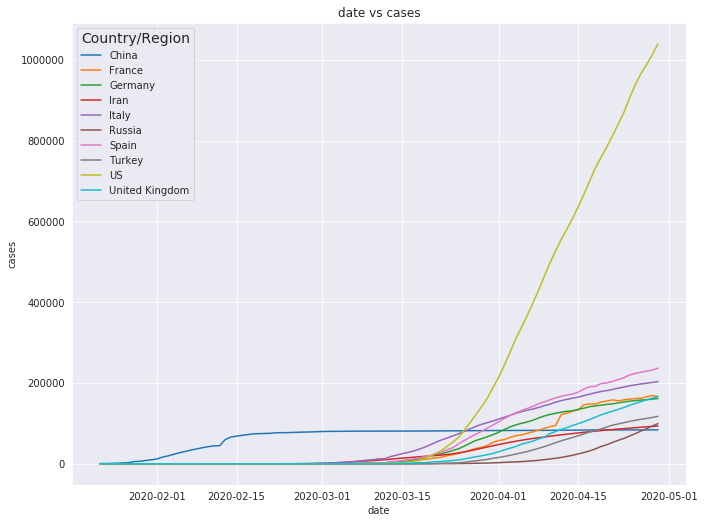

In [2]:
top_ten = cod.select_top_x_regions(
    data=global_df,
    data_type="cases",
    region_cols="Country/Region",
    x=10)

fig, ax = cod.plot_lines(
    data=top_ten,
    x_col="date",
    y_col="cases",
    group_col="Country/Region")

# Cumulative case counts by days since 100 cases

The following code plots the same data above, but with the x axis as the days since each country had 100 cases.

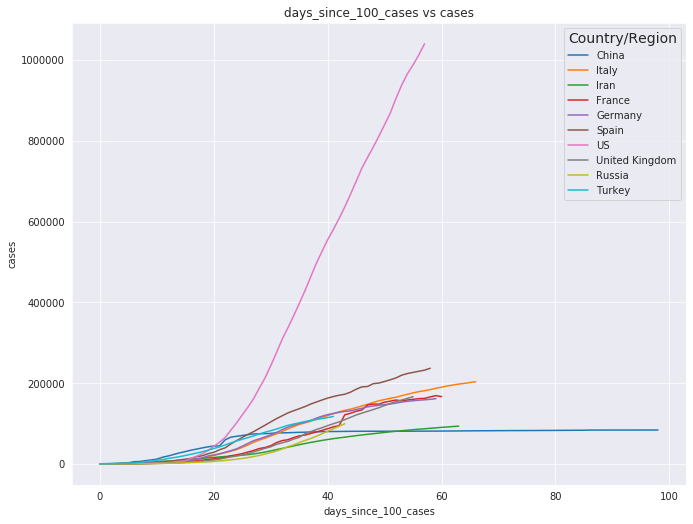

In [3]:
top_ten = cod.select_top_x_regions(
    data=global_df,
    data_type="cases",
    region_cols="Country/Region",
    x=10)

with_days_since = cod.calc_days_since_min_count(
    data=top_ten,
    data_type="cases",
    region_cols="Country/Region",
    min_count=100)

fig, ax = cod.plot_lines(
    data=with_days_since,
    x_col="days_since_100_cases",
    y_col="cases",
    group_col="Country/Region")

# Cumulative cases and daily change on one plot
It's informative to look at the cumulative counts and the daily change in the counts for a country. If you're viewing this interactively, feel free to sub in any particular country you want to look at by editing the `country` variable at the top of the code cell.

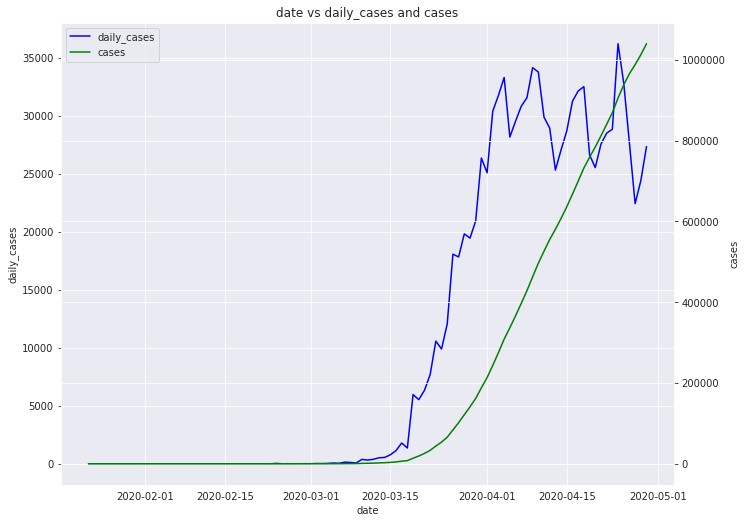

In [4]:
country = "US"
region_group_col = "Country/Region"

country_df = cod.select_regions(
    data=global_df,
    region_col=region_group_col,
    regions=country)

with_daily = cod.calc_daily_change(
    data=country_df,
    data_types="cases",
    region_cols=region_group_col)

fig, ax = cod.plot_lines_two_y(
    data=with_daily,
    x_col="date",
    y1_col="daily_cases",
    y2_col="cases")

# Cumulative cases and daily change, with rolling mean
Sometimes day to day data gets a little jittery. This generates the same plot as the previous example, but with the data smoothed with a centered 5 day rolling mean.

/home/caleb/anaconda3/envs/paynelab/lib/python3.7/site-packages/covid19pandas/selectors.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[region_col] = data[region_col].fillna("n/a")


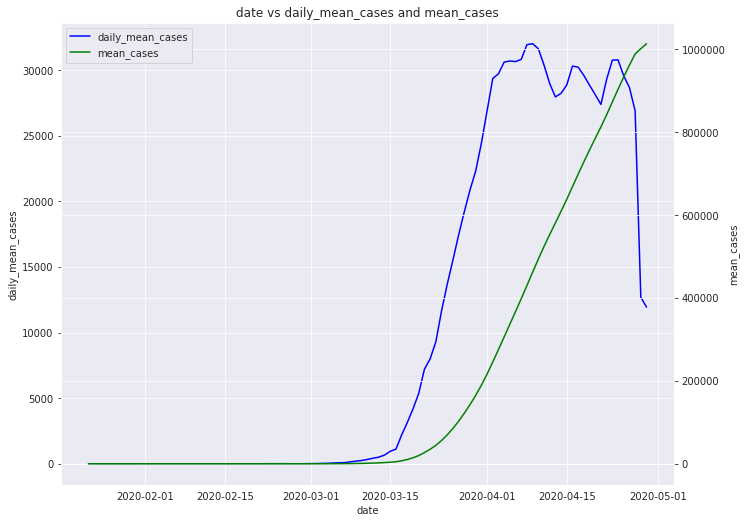

In [5]:
country = "US"
region_group_col = "Country/Region"

country_df = cod.select_regions(
    data=global_df,
    region_col=region_group_col,
    regions=country)

meaned = cod.calc_x_day_rolling_mean(
    data=country_df,
    data_types="cases",
    region_cols=region_group_col,
    x=5)

with_daily = cod.calc_daily_change(
    data=meaned,
    data_types="mean_cases",
    region_cols=region_group_col)

fig, ax = cod.plot_lines_two_y(
    data=with_daily,
    x_col="date",
    y1_col="daily_mean_cases",
    y2_col="mean_cases")